<a href="https://colab.research.google.com/github/Eric-darko/Building-a-classifiier-for-effective-heart-disease-diagnosis/blob/main/Machine_learning_engineer_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [231]:
df = pd.read_csv('salaries.csv')
df.head(3)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M


In [ ]:
df.shape

(16494, 11)

In [ ]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.duplicated().sum()

6401

In [ ]:
df1 = df.drop_duplicates()
df1.duplicated().sum()

0

In [ ]:
df1.shape

(10093, 11)

**Data Exploration**

Exploring Numerical Features

In [ ]:
df1.shape

(10093, 11)

In [ ]:
df_num = df1[['work_year','salary','salary_in_usd','remote_ratio']]
df_num.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,10093.000000,1.009300e+04,10093.000000,10093.000000
mean,2023.225998,1.698488e+05,146652.170118,35.613792
std,0.783392,4.325478e+05,72684.650589,47.244864
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,9.577600e+04,95000.000000,0.000000
50%,2023.000000,1.400000e+05,138750.000000,0.000000
75%,2024.000000,1.885000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


1. The average salary across all individuals is approximately £169,848.

2. The variation in salaries is quite high, with some individuals earning significantly more or less than the average.

3. The lowest salary recorded is £14,000.
4. The highest salary recorded is £30,400,000 and 800000 USD (which is quite exceptional).
5. On average, about 35.6% of people work remotely.
6. The data spans years 2020 to 2024.

# **Distributions of Numerical features**

**Distribution of Salary and Salary in USD**

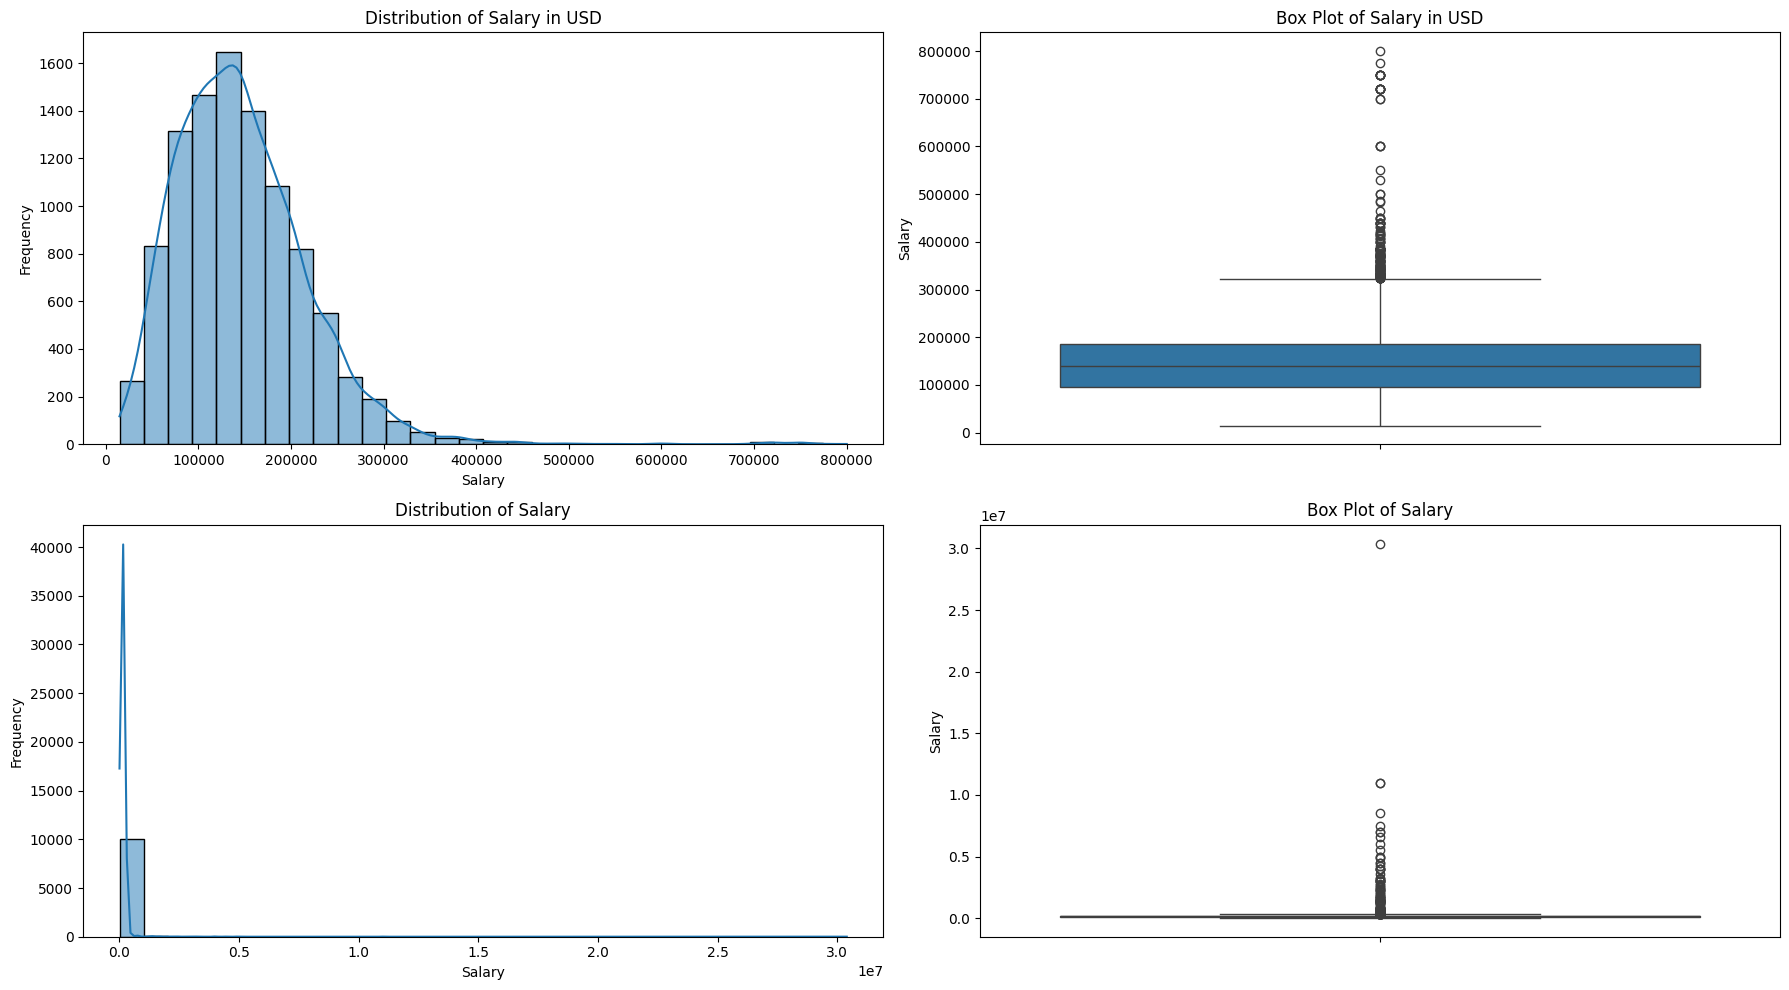

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

# Distribution Visualization: Histogram - Salary in USD
sns.histplot(data=df1, x='salary_in_usd', bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Salary in USD')
axs[0, 0].set_xlabel('Salary')
axs[0, 0].set_ylabel('Frequency')

# Distribution Visualization: Box Plot - Salary in USD
sns.boxplot(data=df1, y='salary_in_usd', ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Salary in USD')
axs[0, 1].set_ylabel('Salary')

# Distribution Visualization: Histogram - Salary
sns.histplot(data=df1, x='salary', bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Salary')
axs[1, 0].set_xlabel('Salary')
axs[1, 0].set_ylabel('Frequency')

# Distribution Visualization: Box Plot - Salary
sns.boxplot(data=df1, y='salary', ax=axs[1, 1])
axs[1, 1].set_title('Box Plot of Salary')
axs[1, 1].set_ylabel('Salary')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Salary in USD

1. The majority of people earn between 0 to 200,000 USD.
2. The highest frequency occurs around 100,000 USD.
3. As salaries increase beyond 200,000 USD, fewer people earn those amounts.

Salary

There is a prominent bar near 0, suggesting that many individuals have salaries close to zero.

Given the diverse range of currencies represented in the salary data, it is evident that there is significant variation. To ensure consistency and facilitate meaningful comparisons, we recommend using salaries denominated in United States Dollars (USD) as our target variable.

## **Work Year**

Text(0, 0.5, 'Frequency')

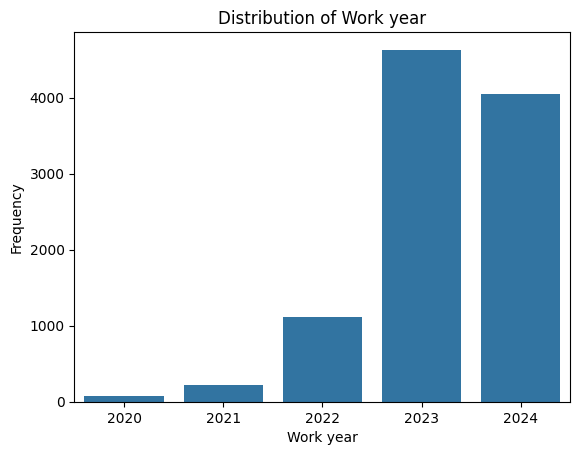

In [ ]:
sns.countplot(data=df1, x='work_year')
plt.title('Distribution of Work year')
plt.xlabel('Work year')
plt.ylabel('Frequency')

1. 2021: The frequency of work years in 2021 is very low.
2. 2022: There is a slight increase in frequency compared to 2021.
3. 2023 and 2024: These years show a significant surge in work frequency, with 2024 having the highest frequency.

suggests a trend of increasing work opportunities over the years, particularly from 2022 onwards.

**Remote Ratio**

Text(0, 0.5, 'frequency')

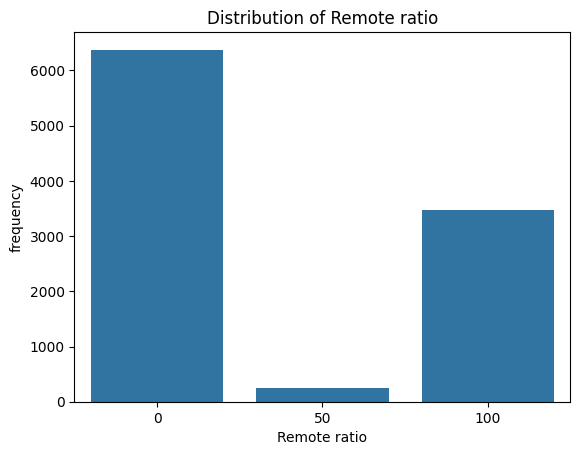

In [ ]:
sns.countplot(data=df1, x='remote_ratio')
plt.title('Distribution of Remote ratio')
plt.xlabel('Remote ratio')
plt.ylabel('frequency')

**Salary in USD**

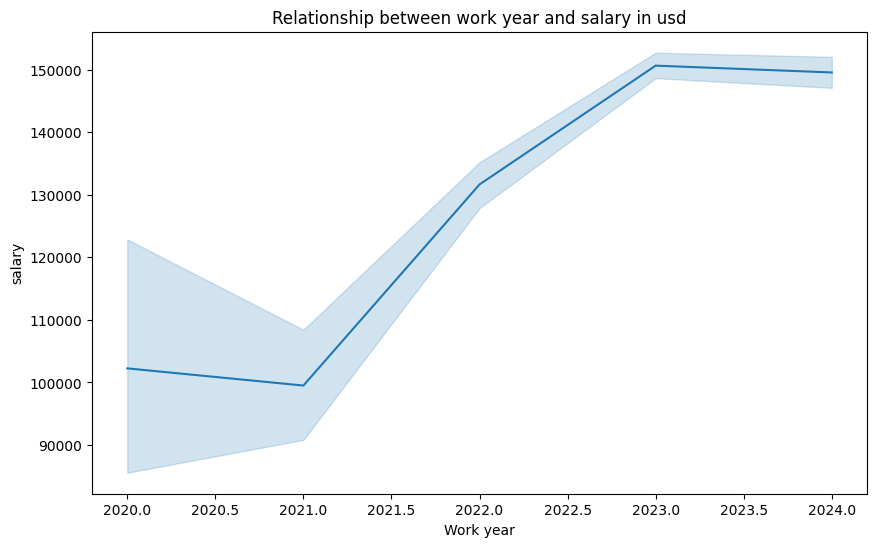

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='work_year',y='salary_in_usd')
plt.title('Relationship between work year and salary in usd')
plt.xlabel('Work year')
plt.ylabel('salary')
plt.show()

**Observations**

The count plot reveals a distinct distribution of work years within the dataset, with the highest frequency observed in 2023 and the lowest in 2020. This indicates that the majority of salary data entries were collected during the year 2023, while relatively fewer observations were recorded in the earlier year 2020. This insight suggests a temporal progression in the collection of salary data, with a notable concentration of entries in the year 2023

Also,  observation that salaries increase as the years progress could be influenced by several factors such as inflation, experience level, market trends, job market dynamics etc. particular attention will be concentrated on the experienced level



# **salary**

In [ ]:
salary_descriptive_stats = df1['salary_in_usd'].describe()

# Print the descriptive statistics
print("Descriptive Statistics for Salary:")
print(salary_descriptive_stats)


Descriptive Statistics for Salary:
count     10093.000000
mean     146652.170118
std       72684.650589
min       15000.000000
25%       95000.000000
50%      138750.000000
75%      185900.000000
max      800000.000000
Name: salary_in_usd, dtype: float64


**Salary and Experience level**

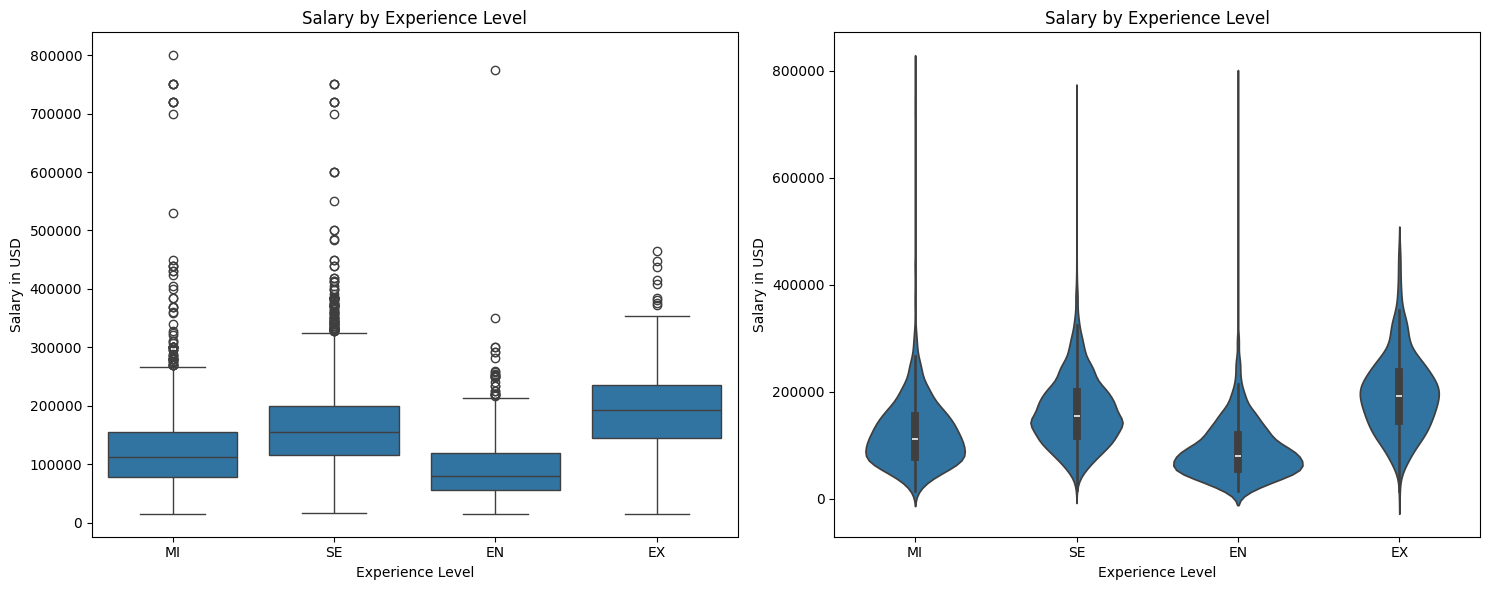

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# box Plot 1: Salary by Experience Level
sns.boxplot(data=df1, x='experience_level', y='salary_in_usd', ax=axs[0])
axs[0].set_title('Salary by Experience Level')
axs[0].set_xlabel('Experience Level')
axs[0].set_ylabel('Salary in USD')

# Violin Plot 2: Salary by Experience Level
sns.violinplot(data=df1, x='experience_level', y='salary_in_usd', ax=axs[1])
axs[1].set_title('Salary by Experience Level')
axs[1].set_xlabel('Experience Level')
axs[1].set_ylabel('Salary in USD')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**Salary and Employment type**

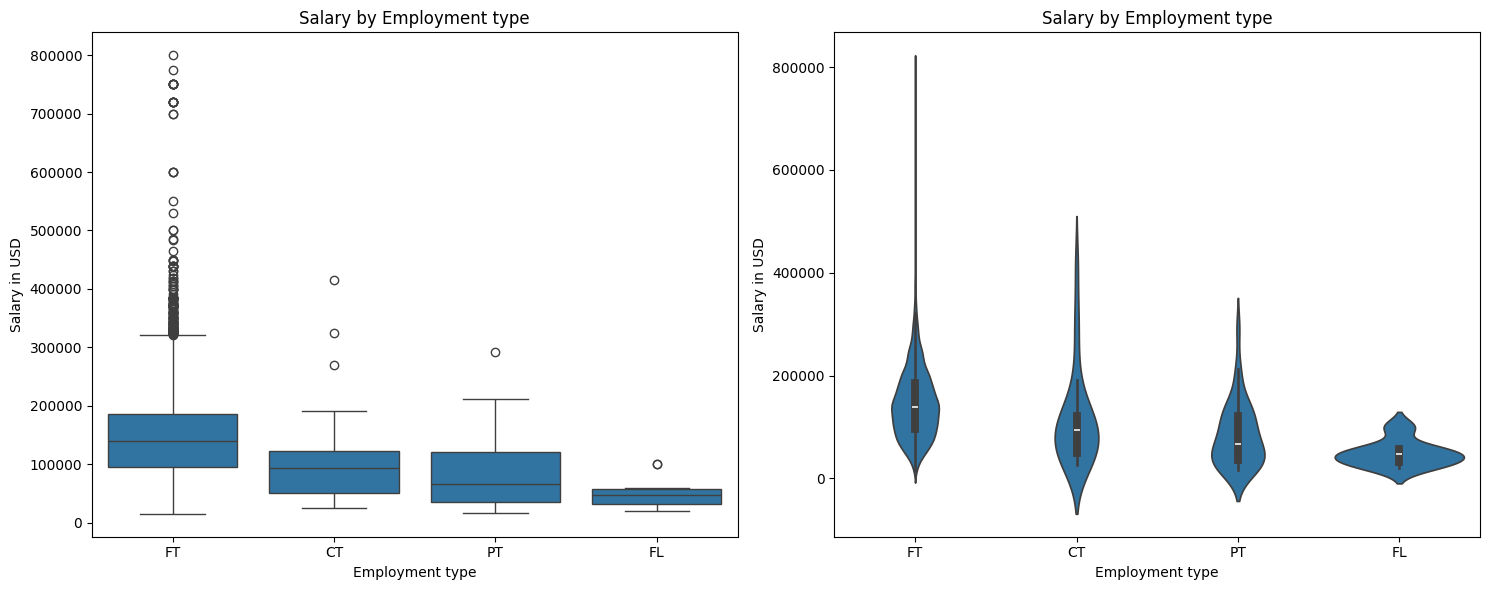

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# box Plot 1: Salary by Experience Level
sns.boxplot(data=df1, x='employment_type', y='salary_in_usd', ax=axs[0])
axs[0].set_title('Salary by Employment type')
axs[0].set_xlabel('Employment type')
axs[0].set_ylabel('Salary in USD')

# Violin Plot 2: Salary by Experience Level
sns.violinplot(data=df1, x='employment_type', y='salary_in_usd', ax=axs[1])
axs[1].set_title('Salary by Employment type')
axs[1].set_xlabel('Employment type')
axs[1].set_ylabel('Salary in USD')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**Salary and companay size**

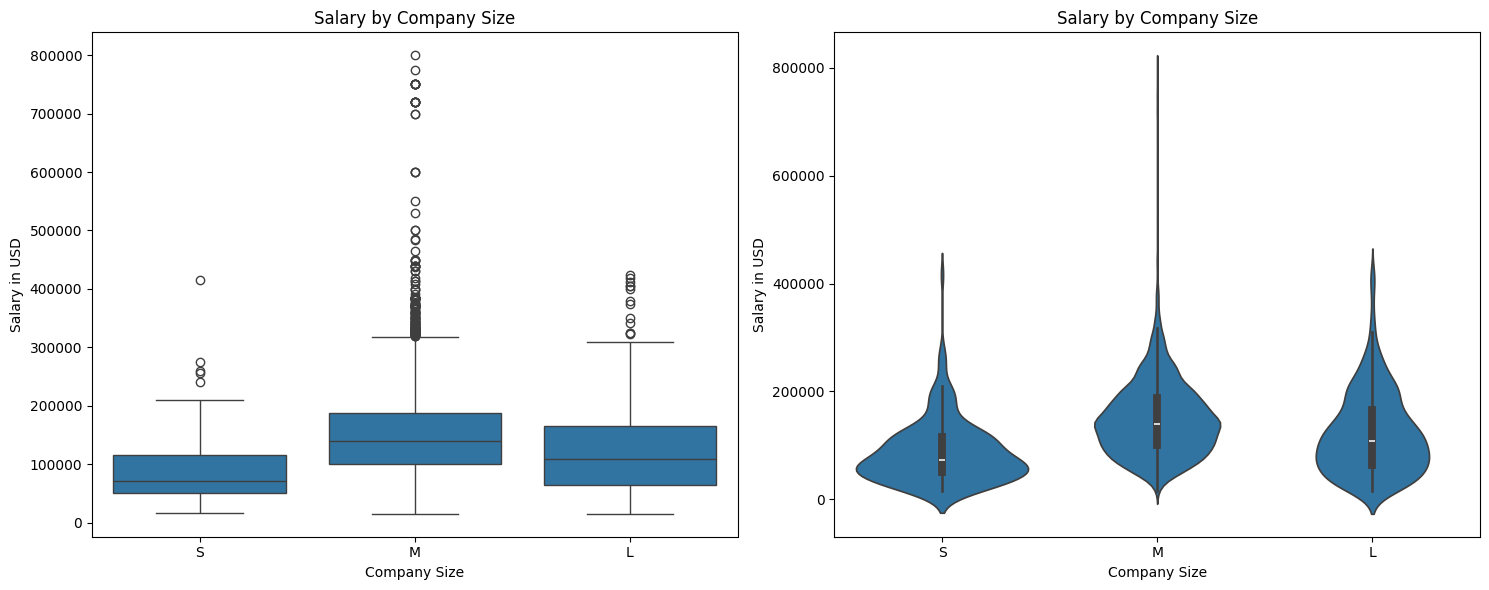

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# box Plot 1: Salary by Experience Level
sns.boxplot(data=df1, x='company_size', y='salary_in_usd', ax=axs[0])
axs[0].set_title('Salary by Company Size')
axs[0].set_xlabel('Company Size')
axs[0].set_ylabel('Salary in USD')

# Violin Plot 2: Salary by Experience Level
sns.violinplot(data=df1, x='company_size', y='salary_in_usd', ax=axs[1])
axs[1].set_title('Salary by Company Size')
axs[1].set_xlabel('Company Size')
axs[1].set_ylabel('Salary in USD')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



**Salary in usd and Remote ratio**

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

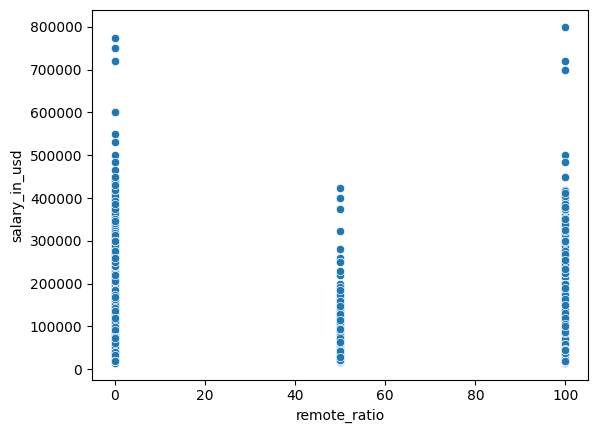

In [ ]:
sns.scatterplot(data=df1, x='remote_ratio',y='salary_in_usd')

There isn’t a straightforward correlation between remote work and salary.
Factors beyond remote work, such as experience, location, and company policies, likely influence salaries.
Further analysis would be needed to understand the nuances behind these data points.

In [ ]:
# Group the data by remote ratio and calculate the mean salary for each group
mean_salary_by_remote_ratio = df1.groupby('remote_ratio')['salary_in_usd'].mean()

# Display the mean salary for each remote ratio level
print("Mean Salary by Remote Ratio:")
print(mean_salary_by_remote_ratio)


Mean Salary by Remote Ratio:
remote_ratio
0      150967.867451
50      83086.631579
100    143249.150101
Name: salary_in_usd, dtype: float64


<ipython-input-81-d3da935545a6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_salary_by_remote_ratio, x='remote_ratio', y='salary', palette='viridis')


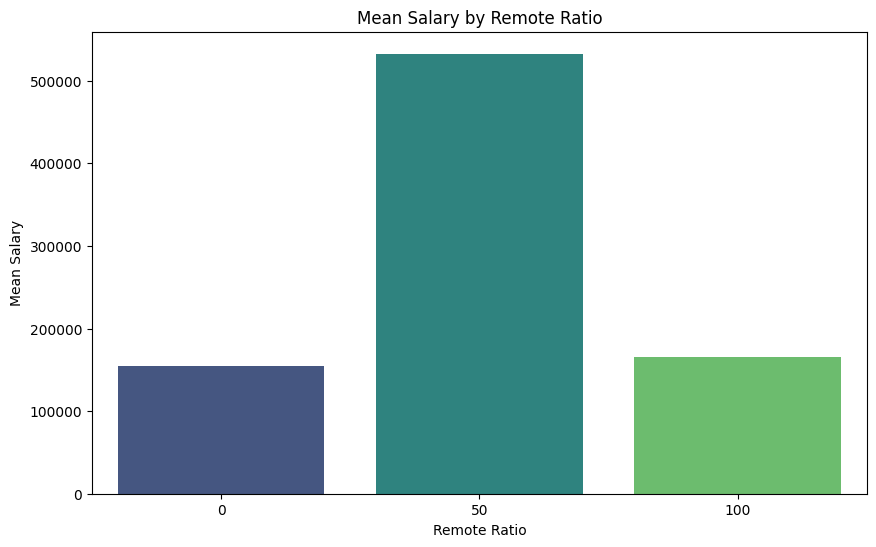

In [ ]:
# Group the data by remote ratio and calculate the mean salary for each group
mean_salary_by_remote_ratio = df.groupby('remote_ratio')['salary'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the mean salary for each remote ratio level
sns.barplot(data=mean_salary_by_remote_ratio, x='remote_ratio', y='salary', palette='viridis')

# Add labels and title
plt.xlabel('Remote Ratio')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Remote Ratio')

# Show plot
plt.show()


There appear to be significant differences in mean salaries based on remote work ratios. However, statistical tests will be conducted to confirm this

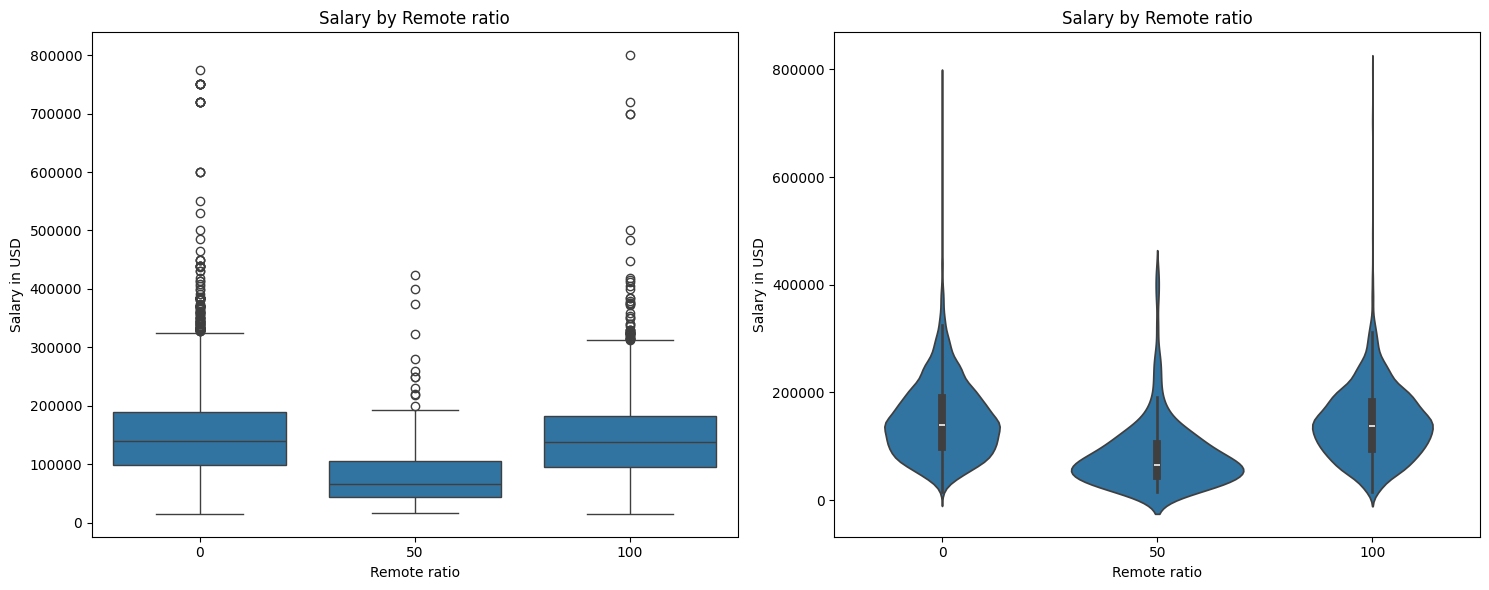

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# box Plot 1: Salary by Experience Level
sns.boxplot(data=df1, x='remote_ratio', y='salary_in_usd', ax=axs[0])
axs[0].set_title('Salary by Remote ratio')
axs[0].set_xlabel('Remote ratio')
axs[0].set_ylabel('Salary in USD')

# Violin Plot 2: Salary by Experience Level
sns.violinplot(data=df1, x='remote_ratio', y='salary_in_usd', ax=axs[1])
axs[1].set_title('Salary by Remote ratio')
axs[1].set_xlabel('Remote ratio')
axs[1].set_ylabel('Salary in USD')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



In [ ]:
# Calculate the correlation coefficient
correlation = df1['remote_ratio'].corr(df1['salary_in_usd'])

print("Pearson Correlation Coefficient:", correlation)


Pearson Correlation Coefficient: -0.056735925692568


This suggests a weak negative linear relationship between the remote ratio and salary. In other words, as the remote ratio increases, there is a slight tendency for the salary in USD to decrease, although the relationship is not very strong.

**Salary Changes over time**

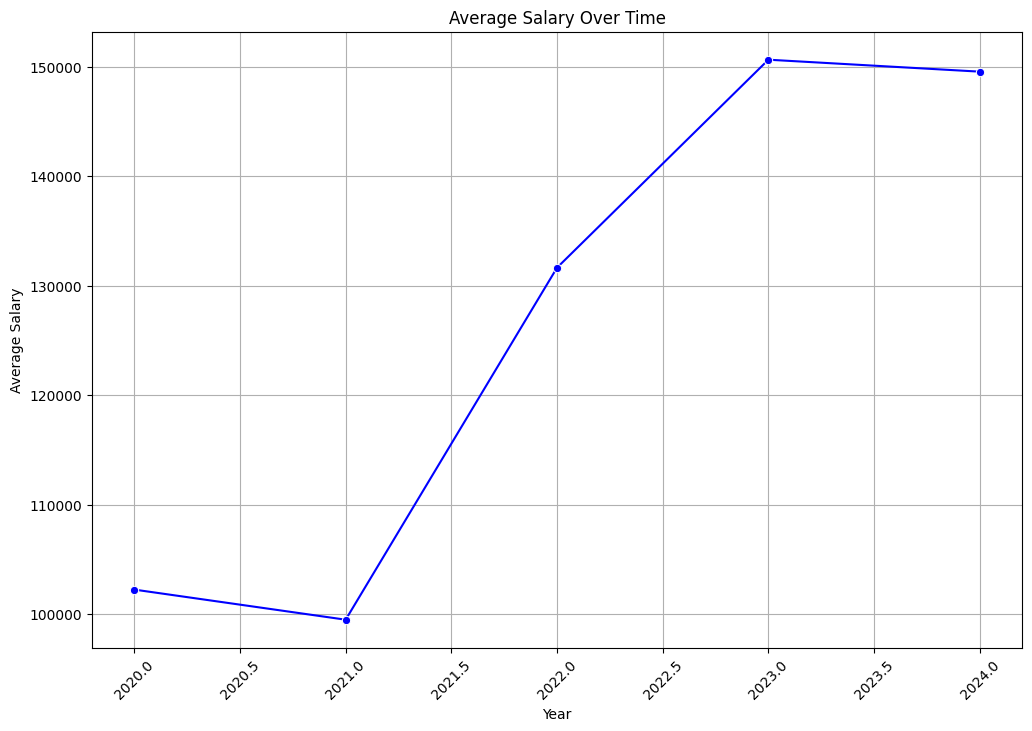

In [ ]:
# Group data by work_year and calculate average salary for each year
average_salary_by_year = df1.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Plot average salaries over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_salary_by_year, x='work_year', y='salary_in_usd', marker='o', color='b')
plt.title('Average Salary Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for better visualization
plt.show()


**Correlation Analyis between Salary and other numerical features**

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['salary', 'salary_in_usd', 'remote_ratio']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 salary  salary_in_usd  remote_ratio
salary         1.000000       0.137377      0.020949
salary_in_usd  0.137377       1.000000     -0.057695
remote_ratio   0.020949      -0.057695      1.000000


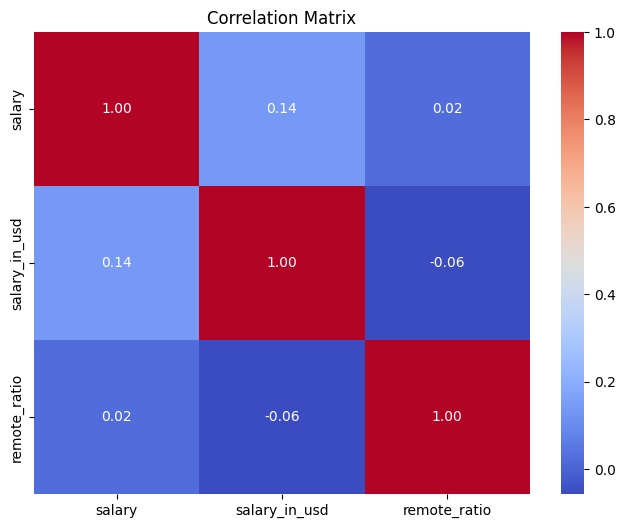

In [ ]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# **Categorical Features**

In [ ]:
df1.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

**Job title**

In [ ]:
# Drop duplicates based on the 'job_title' column
df_no_duplicates = df1.drop_duplicates(subset=['job_title'])

# Sort the DataFrame by salary_in_usd in descending order
highest_paid_jobs = df_no_duplicates.sort_values(by='salary_in_usd', ascending=False)

# Display the top job titles with high salaries
top_job_titles = highest_paid_jobs[['job_title', 'salary_in_usd','employee_residence','remote_ratio']].head(20)
print("Top Job Titles with High Salaries:")
print(top_job_titles)

Top Job Titles with High Salaries:
                                      job_title  salary_in_usd  \
4120                   Head of Machine Learning         448000   
12018             Analytics Engineering Manager         399880   
15131                    Data Science Tech Lead         375000   
7241                     Deep Learning Engineer         303387   
1888   Machine Learning Infrastructure Engineer         300000   
60                                 Data Science         283800   
114                  Machine Learning Scientist         277000   
5499             Managing Director Data Science         260000   
12413                        AWS Data Architect         258000   
18                                  ML Engineer         252000   
2740                Machine Learning Researcher         250800   
136                           Applied Scientist         250000   
15822                      Cloud Data Architect         250000   
268                         Data Analytic

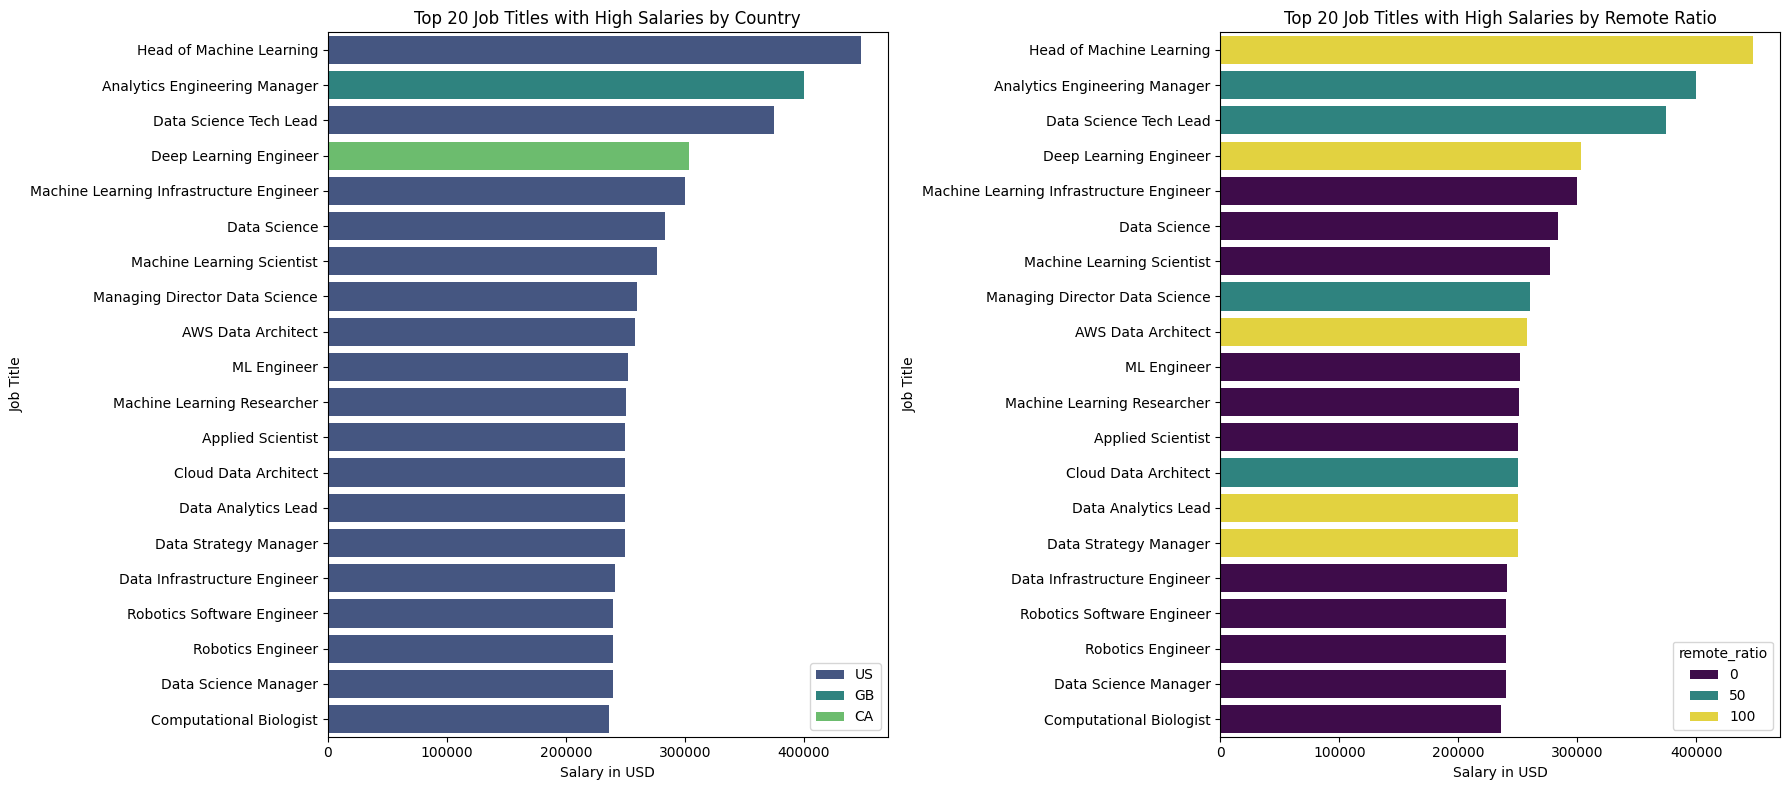

In [ ]:
# Set the figure size and create subplots
plt.figure(figsize=(18, 8))

# Create the first subplot
plt.subplot(1, 2, 1)
sns.barplot(data=top_job_titles, x='salary_in_usd', y='job_title', hue='employee_residence', palette='viridis')
plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
plt.legend(loc='lower right')
plt.title('Top 20 Job Titles with High Salaries by Country')

# Create the second subplot
plt.subplot(1, 2, 2)
sns.barplot(data=top_job_titles, x='salary_in_usd', y='job_title', hue='remote_ratio', palette='viridis')
plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
plt.title('Top 20 Job Titles with High Salaries by Remote Ratio')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


**Experience Level**

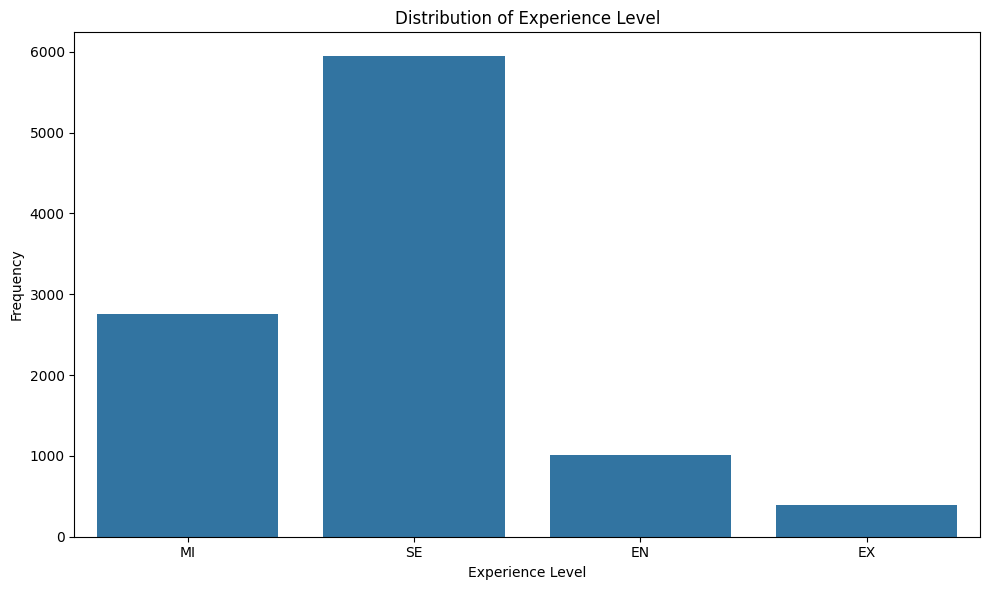

In [ ]:

# Create a figure and set the size
plt.figure(figsize=(10, 6))

sns.countplot(data=df1, x='experience_level')
plt.title('Distribution of Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Frequency')
# Adjust layout and show plot
plt.tight_layout()
plt.show()


Text(0, 0.5, 'experience level')

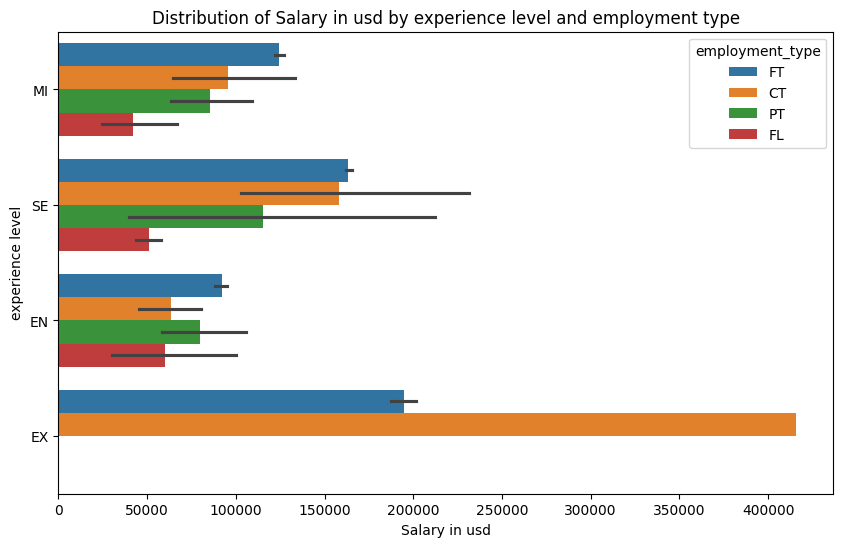

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df1, x='salary_in_usd', y='experience_level',hue='employment_type')
plt.title('Distribution of Salary in usd by experience level and employment type')
plt.xlabel('Salary in usd')
plt.ylabel('experience level')

Full-time employees generally have higher salaries across all experience levels.
Freelancers at the EN and EX levels earn significantly more than those at the MI and SE levels.

**employment type**

Text(0, 0.5, 'frequency')

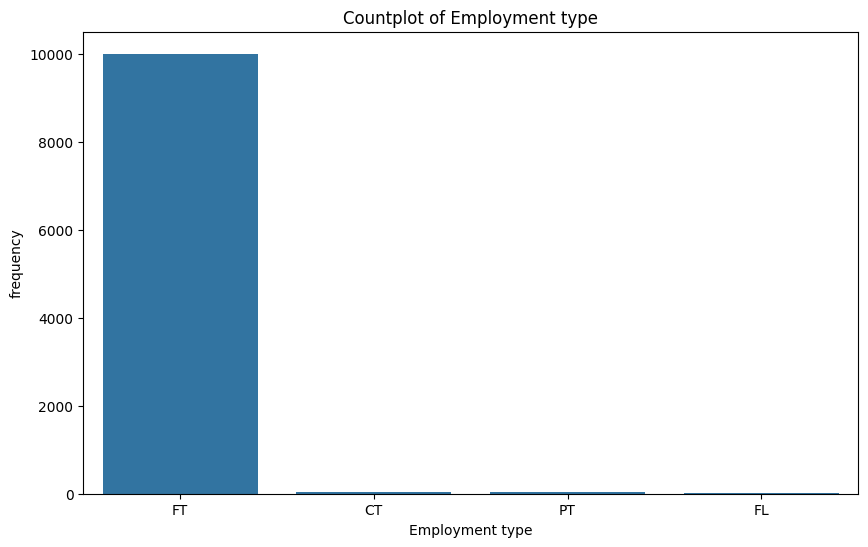

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='employment_type')
plt.title('Countplot of Employment type')
plt.xlabel('Employment type')
plt.ylabel('frequency')

Text(0, 0.5, 'employment type')

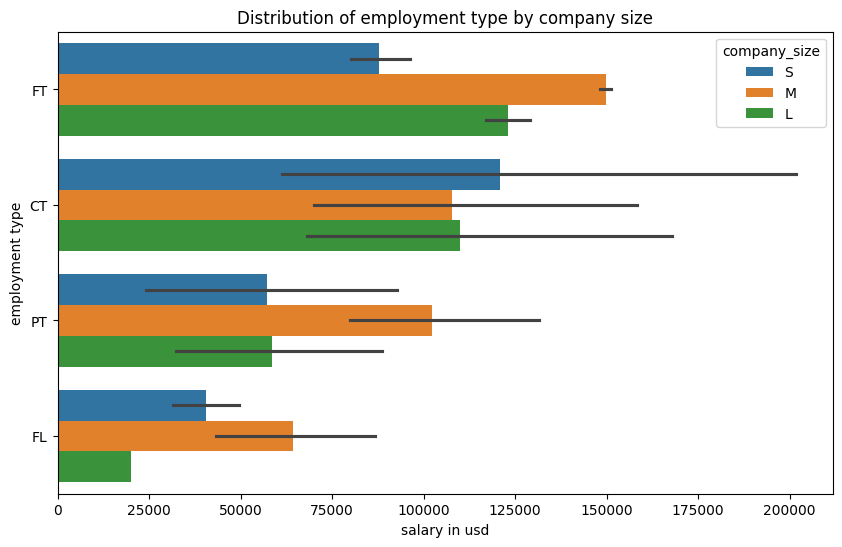

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df1,x='salary_in_usd',y='employment_type',hue='company_size')
plt.title('Distribution of employment type by company size')
plt.xlabel('salary in usd')
plt.ylabel('employment type')

Full-Time Employees: Generally have higher salaries across all company sizes, with those in large companies earning the most.
Contract Employees: Earn less than full-time employees but have varied salaries.
Part-Time and Freelance Workers: Earn significantly less, with slight variations based on company size.

In [ ]:
employment_type_counts = df1['employment_type'].value_counts()
print("Counts of each employment type:")
print(employment_type_counts)


Counts of each employment type:
employment_type
FT    10013
PT       38
CT       28
FL       14
Name: count, dtype: int64


In [ ]:
df1.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

**Statistical Tests** **(ANOVA)**

In [ ]:
# Extract salary data for each remote ratio category
remote_ratio_0 = df1[df1['remote_ratio'] == 0]['salary_in_usd']
remote_ratio_50 = df1[df1['remote_ratio'] == 50]['salary_in_usd']
remote_ratio_100 = df1[df1['remote_ratio'] == 100]['salary_in_usd']

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(remote_ratio_0, remote_ratio_50, remote_ratio_100)

print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 111.90324429231855
p-value: 8.554326973125931e-49




The p-value is extremely small (approximately 8.55e-49), indicating strong evidence against the null hypothesis. In other words, there is very strong evidence to suggest that there are significant differences in mean salary across the different remote work ratio categories.

In [ ]:
# Get list of categorical variables
categorical_vars = df1.select_dtypes(include='object').columns

# Perform one-way ANOVA for each categorical variable
for var in categorical_vars:
    # Group data by current categorical variable and convert to list
    grouped_data = [group.dropna() for name, group in df.groupby(var)['salary_in_usd']]

    # Apply ANOVA test
    f_statistic, p_value = f_oneway(*grouped_data)

    # Print results
    print(f"\nOne-Way ANOVA Results for {var}:")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)

    # Interpret results
    if p_value < 0.05:  # Assuming a significance level of 0.05
        print(f"There are significant differences in mean salary across different levels of {var}.")
    else:
        print(f"There are no significant differences in mean salary across different levels of {var}.")



One-Way ANOVA Results for experience_level:
F-statistic: 792.0507124027428
p-value: 0.0
There are significant differences in mean salary across different levels of experience_level.

One-Way ANOVA Results for employment_type:
F-statistic: 24.733562750420404
p-value: 5.829013199017904e-16
There are significant differences in mean salary across different levels of employment_type.

One-Way ANOVA Results for job_title:
F-statistic: 25.62357467328068
p-value: 0.0
There are significant differences in mean salary across different levels of job_title.

One-Way ANOVA Results for salary_currency:
F-statistic: 90.29162056793479
p-value: 0.0
There are significant differences in mean salary across different levels of salary_currency.

One-Way ANOVA Results for employee_residence:
F-statistic: 24.46696903063822
p-value: 0.0
There are significant differences in mean salary across different levels of employee_residence.

One-Way ANOVA Results for company_location:
F-statistic: 26.71876398674317
p-va

Clearly all categorical variables tested show significant differences in mean salary across their respective categories. This indicates that each of these variables has a meaningful impact on determining salary levels. Therefore, we will consider experience level, employment type, job title, salary currency, employee residence, company location, and company size.

Experience Level and Salary Currency have extremely high F-statistics and very low p-values, indicating they have a strong impact on salary_in_usd.
Company Size also has a very low p-value, indicating its significance, but the F-statistic is not as high as the other variables.
Employment Type, Job Title, Employee Residence, and Company Location have relatively lower F-statistics compared to Experience Level and Salary Currency but still have very low p-values, indicating significance.


**Treating Extreme Outliers**

In [ ]:
from scipy.stats import zscore

# Calculate z-scores for the salary_in_usd column
z_scores_salary = zscore(df1['salary_in_usd'])

# Define a threshold for outliers (e.g., z-score greater than 3 or less than -3)
threshold = 2

# Identify outliers based on the threshold
outliers = (z_scores_salary > threshold) | (z_scores_salary < -threshold)

# Print the indices of outliers
print("Indices of outliers in salary_in_usd:")
print(df1[outliers].index)

# Alternatively, print the rows containing outliers
print("\nRows with outliers in salary_in_usd:")
print(df1[outliers])


Indices of outliers in salary_in_usd:
Index([  174,   269,   299,   345,   353,   361,   477,   528,   571,   573,
       ...
       15597, 15909, 16167, 16219, 16224, 16276, 16421, 16440, 16486, 16489],
      dtype='int64', length=319)

Rows with outliers in salary_in_usd:
       work_year experience_level employment_type  \
174         2024               SE              FT   
269         2024               SE              FT   
299         2024               SE              FT   
345         2024               SE              FT   
353         2024               SE              FT   
...          ...              ...             ...   
16276       2020               MI              FT   
16421       2021               EX              CT   
16440       2020               EX              FT   
16486       2021               MI              FT   
16489       2020               SE              FT   

                                job_title  salary salary_currency  \
174             Mac

In [ ]:
# Drop the rows containing outliers from the DataFrame
df_cleaned = df1.drop(df1[outliers].index)

# Check the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", df_cleaned.shape)


Shape of DataFrame after removing outliers: (9774, 11)


In [ ]:
df_cleaned['salary_in_usd'].describe()

count      9774.000000
mean     139611.447411
std       59377.930431
min       15000.000000
25%       94000.000000
50%      135466.000000
75%      180000.000000
max      292000.000000
Name: salary_in_usd, dtype: float64

<Axes: ylabel='salary_in_usd'>

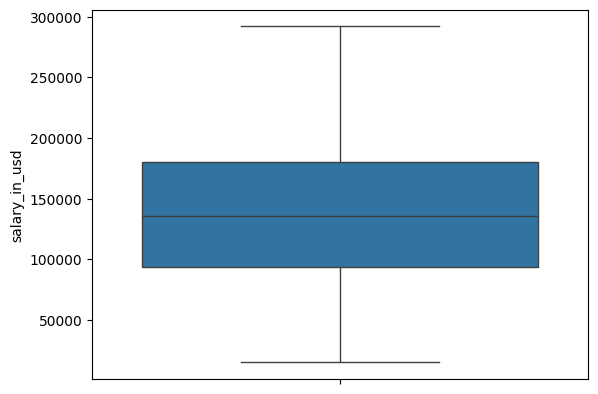

In [ ]:
sns.boxplot(df_cleaned, y='salary_in_usd')


In [ ]:
df_cleaned['salary_in_usd'].skew()

0.3003299869063608

Given that there are 209 rows containing outliers based on the z-score threshold of ±3 standard deviations, we will proceed by removing these rows from the dataset. This approach aims to ensure that the outliers do not unduly influence the analysis and model performance. By removing the outliers, we aim to create a more robust and reliable dataset for our predictive modeling task

In [ ]:
df_cleaned.drop(columns=['salary','salary_currency'], inplace=True)

In [ ]:
#Select numerical features for standardization
numerical_features = ['salary_in_usd','remote_ratio']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization only to numerical features
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])


In [ ]:
df_cleaned.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,USD,-0.330299,AU,-0.759465,AU,S
1,2024,MI,FT,Data Scientist,USD,-1.172405,AU,-0.759465,AU,S
2,2024,MI,CT,Data Scientist,USD,-0.161877,US,-0.759465,US,M
3,2024,MI,CT,Data Scientist,USD,-0.498720,US,-0.759465,US,M
4,2024,MI,FT,Data Science Manager,USD,1.690758,US,-0.759465,US,M


In [ ]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Assuming df is your DataFrame with the categorical variables

# Selecting the ordinal categorical variables
ordinal_vars = ['employment_type','work_year','job_title','salary_currency','employee_residence', 'company_location']
# Applying label encoding to the ordinal variables
label_encoder = LabelEncoder()
for var in ordinal_vars:
    df_cleaned[var] = label_encoder.fit_transform(df_cleaned[var])

# Selecting the nominal categorical variables
nominal_vars = ['experience_level','company_size']

# Applying one-hot encoding to the nominal variables
df_encoded = pd.get_dummies(df_cleaned, columns=nominal_vars)

# Displaying the encoded DataFrame
df_encoded.head(3)

,work_year,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S
0,4,2,88,21,-0.330299,6,-0.759465,6,False,False,True,False,False,False,True
1,4,2,88,21,-1.172405,6,-0.759465,6,False,False,True,False,False,False,True
2,4,0,88,21,-0.161877,83,-0.759465,73,False,False,True,False,False,True,False


In [ ]:
# Define a function to convert boolean values to integers, excluding specific columns
def convert_boolean_to_integer(value):
    if isinstance(value, bool):
        return int(value)
    else:
        return value

# Apply the function to all boolean columns, excluding specific columns
boolean_columns = [col for col in df_encoded.columns if df_encoded[col].dtype == bool and col not in ['salary_in_usd', 'remote_ratio']]
df_encoded[boolean_columns] = df_encoded[boolean_columns].applymap(convert_boolean_to_integer)

# Display the DataFrame after converting boolean columns to integers
df_encoded.head()


,work_year,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S
0,4,2,88,21,-0.330299,6,-0.759465,6,0,0,1,0,0,0,1
1,4,2,88,21,-1.172405,6,-0.759465,6,0,0,1,0,0,0,1
2,4,0,88,21,-0.161877,83,-0.759465,73,0,0,1,0,0,1,0
3,4,0,88,21,-0.498720,83,-0.759465,73,0,0,1,0,0,1,0
4,4,2,86,21,1.690758,83,-0.759465,73,0,0,1,0,0,1,0


In [ ]:
# X contains the features (independent variables)
# y contains the target variable (salary_in_usd)

X = df_encoded.drop(columns=['salary_in_usd'])  # Features
y = df_encoded['salary_in_usd']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (7819, 14)
Shape of X_test: (1955, 14)
Shape of y_train: (7819,)
Shape of y_test: (1955,)


**Random Forest**

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)
pred_decision = rf.predict(X_test)

rfs = r2_score(y_test, pred_decision)
print('R2_score:',rfs*100)

#rfscore = cross_val_score(rf,X,y,cv=2)
#rfc = rfscore.mean()
#print('cross val:', rfc*100)
#print(cv_mean*100)
#print('Difference between accuracy for GB and cross validation score is', rfs*100-rfc*100)

R2_score: 35.05721313393203


**Cross Validation for Random Forest**

In [ ]:
from sklearn.model_selection import cross_val_score


# Assuming X_train and y_train are your training features and target
# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
# cv=5 specifies 5-fold cross-validation, you can adjust the number of folds as needed
# 'r2' is just one of many scoring metrics available in scikit-learn, you can choose another metric that suits your problem

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())


Cross-Validation Scores: [0.36431054 0.32486665 0.33064101 0.32812766 0.35102476]
Mean CV Score: 0.339794125559375
Standard Deviation of CV Scores: 0.015296383389597972


**Hyperparameter Tunning for the Random Forest Model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest regressor
rf = RandomForestRegressor()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model with optimal hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = best_rf.score(X_test, y_test)
print("Test R^2 Score:", test_score)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Test R^2 Score: 0.3514573216207556


In [ ]:
smv = SVR()
smv.fit(X_train, y_train)
smv_score_train = smv.score(X_train,y_train)
pred_smv = smv.predict(X_test)
smv_score_train*100

24.654816836327488

In [ ]:
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)
GB_score = GB.score(X_train,y_train)
pred_GB = GB.predict(X_test)
GB_score*100

41.01354889111957

In [ ]:


# Initialize the Decision Tree Regressor model
DT = DecisionTreeRegressor()

# Train the model
DT.fit(X_train, y_train)

# Get the training score
DT_score_train = DT.score(X_train, y_train)

# Make predictions on the test set
pred_DT = DT.predict(X_test)

# Print the training score
print("Decision Tree Regressor Training Score:", DT_score_train * 100)


Decision Tree Regressor Training Score: 51.47307557379238


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create KNN regressor object
knn_regressor = KNeighborsRegressor(n_neighbors=4)  # Set the number of neighbors (k)

# Fit the model
knn_regressor.fit(X_train, y_train)

#Get the training score
knn_score_train = knn_regressor.score(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the training score
print("knn Regressor Training Score:", knn_score_train * 100)


Mean Squared Error: 0.7598383916223936
knn Regressor Training Score: 35.25489573108648


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network model
model = Sequential()

# Add input layer (number of features in X_train) and hidden layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)


Epoch 1/100
196/196 [==============================] - 2s 7ms/step - loss: 4.5625 - mse: 4.5625 - val_loss: 0.9080 - val_mse: 0.9080
Epoch 2/100
196/196 [==============================] - 1s 4ms/step - loss: 0.9031 - mse: 0.9031 - val_loss: 0.8691 - val_mse: 0.8691
Epoch 3/100
196/196 [==============================] - 1s 4ms/step - loss: 0.8674 - mse: 0.8674 - val_loss: 0.8521 - val_mse: 0.8521
Epoch 4/100
196/196 [==============================] - 1s 4ms/step - loss: 0.8668 - mse: 0.8668 - val_loss: 0.7992 - val_mse: 0.7992
Epoch 5/100
196/196 [==============================] - 1s 4ms/step - loss: 0.8409 - mse: 0.8409 - val_loss: 0.8356 - val_mse: 0.8356
Epoch 6/100
196/196 [==============================] - 1s 3ms/step - loss: 0.8224 - mse: 0.8224 - val_loss: 0.8909 - val_mse: 0.8909
Epoch 7/100
196/196 [==============================] - 1s 3ms/step - loss: 0.8188 - mse: 0.8188 - val_loss: 0.8316 - val_mse: 0.8316
Epoch 8/100
196/196 [==============================] - 1s 3ms/step - 